In [0]:
import json
import requests

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

sns.set_palette('Set2')
%matplotlib inline

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
cd /content/drive/My Drive/nus_blockchain

/content/drive/My Drive/nus_blockchain


In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/nus_blockchain/bitcoin-historical-data.zip", 'r')
zip_ref.extractall()
zip_ref.close()
data = pd.read_csv('/content/drive/My Drive/nus_blockchain/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')
data.isnull().values.any()
data = data.dropna(how='any',axis=0)

In [90]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [91]:
data['Date'] = pd.to_datetime(data['Timestamp'],unit='s').dt.date
group = data.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [0]:
new_data= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [94]:
new_data.head()

,Close
Date,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


Text(0, 0.5, '$(Dollar)')

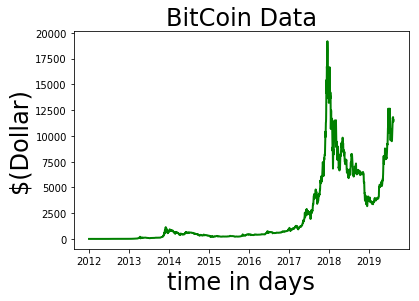

In [95]:
plt.plot(new_data,color='green', lw=2)
plt.title("BitCoin Data",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

In [102]:
# df = df[['Close']]
data=new_data
forecast_out = int(20)

data['Prediction'] = data[['Close']].shift(-forecast_out)

X = np.array(data.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(data['Prediction'])
y = y[:-forecast_out]
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2,random_state=0)

clf = LinearRegression()
clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)
print(y_predict[0])
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

7907.075370722466
confidence:  0.921453824525453
[ 9667.08685357  9976.27362179  9738.03231752  9692.27827737
  9452.99219516  9506.56002095  9507.61295372  9819.68857824
 10043.30404746 10426.85175101 10731.51476505 10766.98142673
 11607.78050533 11688.25263989 11642.97327045 11731.30042299
 11748.99771836 11512.38613697 11315.14866    11474.69612356]


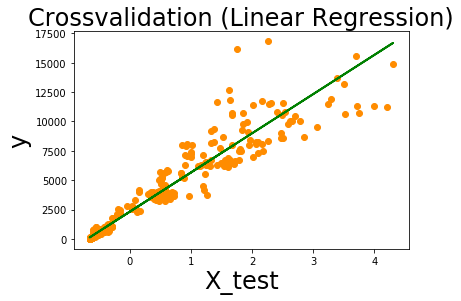

In [103]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, y_predict, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_predict))
print(rms)

967.036225678407


In [105]:
last_date = new_data.iloc[-1].name
print(last_date)

2019-08-12


In [107]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(data.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-08-12 to 2019-08-31
Data columns (total 1 columns):
Close    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.471603    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.208159    6.495556


Text(0, 0.5, '$(Dollar)')

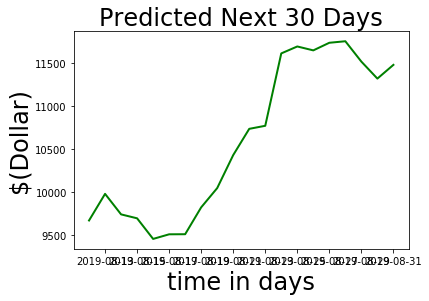

In [108]:
plt.plot(df1,color='green', lw=2)
plt.title("Predicted Next 30 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

Text(0, 0.5, '$(Dollar)')

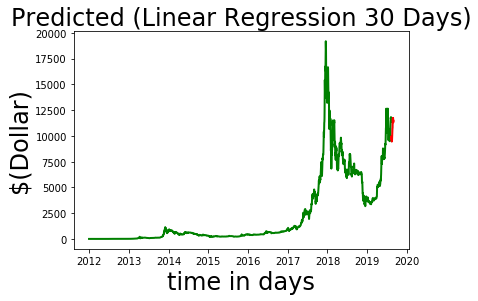

In [109]:
plt.plot(df1,)
plt.plot(data['Close'],color='green', lw=2, label='Bitcoin Data')
plt.plot(df1['Close'],color='red', lw=2, label='Predicted')
plt.title("Predicted (Linear Regression 30 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)